In [1]:

# Time Series
data(AirPassengers)
summary(AirPassengers)
frequency(AirPassengers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

[1] 12

In [2]:
head(AirPassengers)

[1] 112 118 132 129 121 135

[1] "ts"

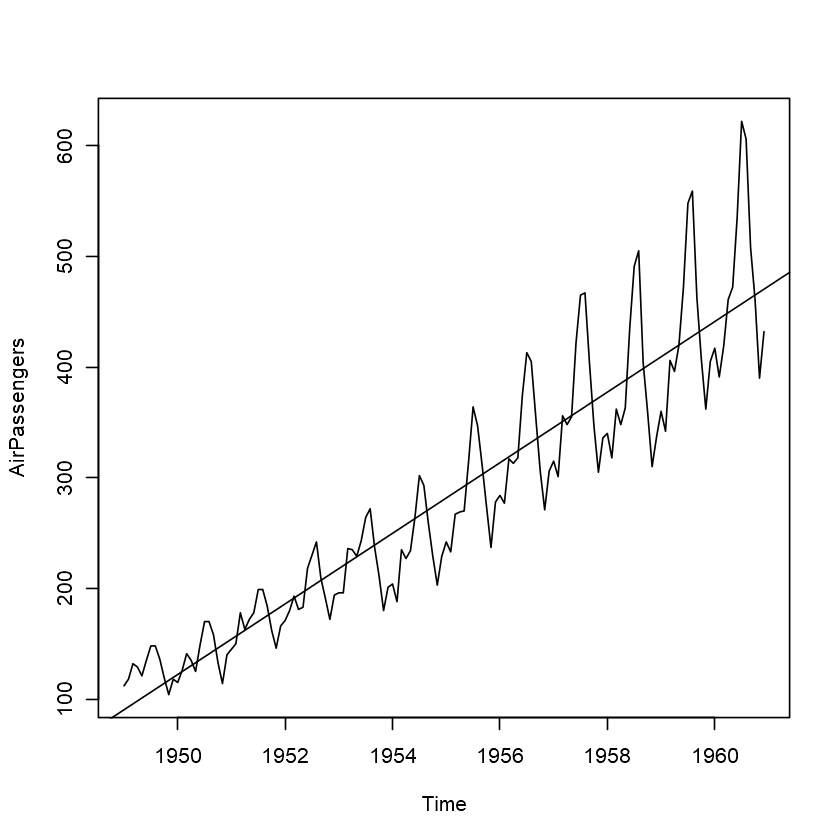

In [3]:
class(AirPassengers)

plot(AirPassengers)
abline(reg=lm(AirPassengers~time(AirPassengers)))

In [6]:
adf.test(AirPassengers,
         alternative="stationary", k=0)

Warning message in adf.test(AirPassengers, alternative = "stationary", k = 0):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  AirPassengers
Dickey-Fuller = -4.6392, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [4]:
library(tseries)
adf.test(diff(log(AirPassengers)),
         alternative="stationary", k=0)

Warning message in adf.test(diff(log(AirPassengers)), alternative = "stationary", :
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(log(AirPassengers))
Dickey-Fuller = -9.6003, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


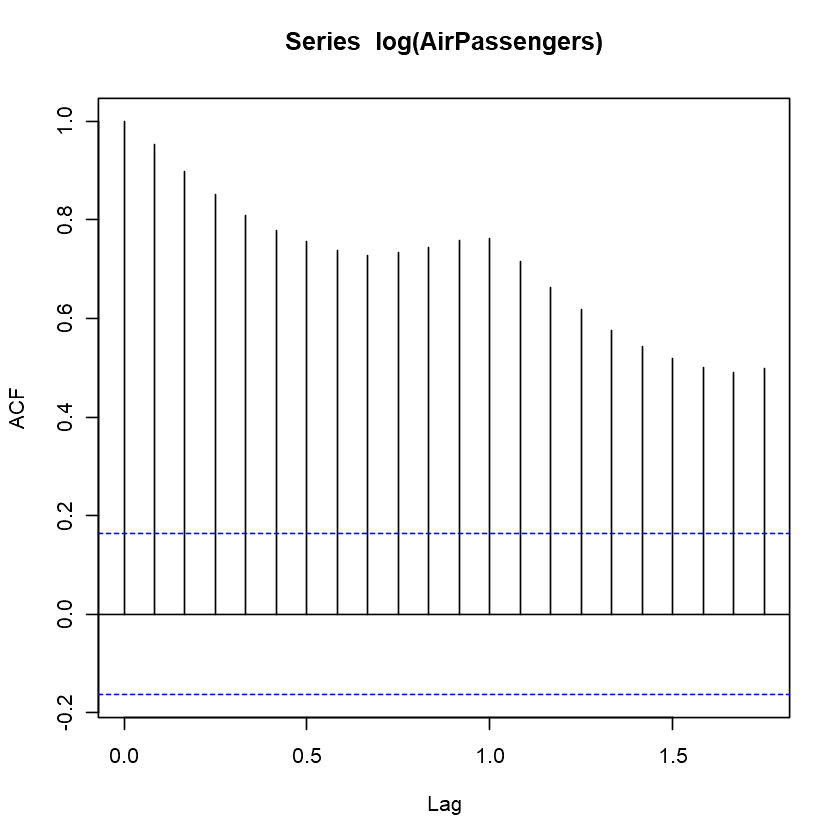

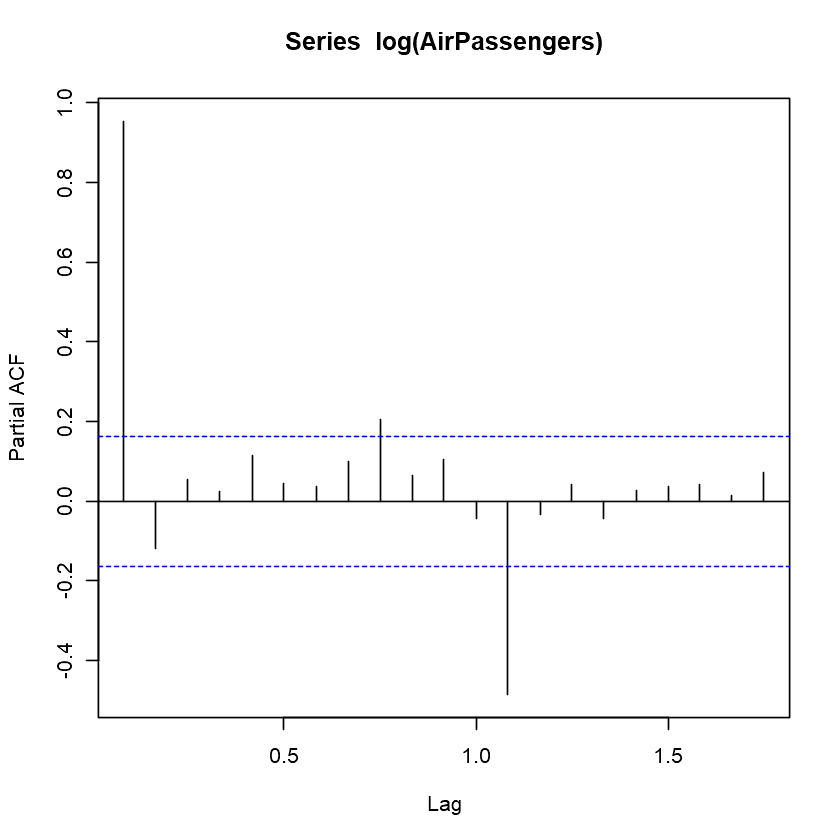

In [7]:
#find the right parameters to be used in the ARIMA model
acf(log(AirPassengers))
pacf(log(AirPassengers))

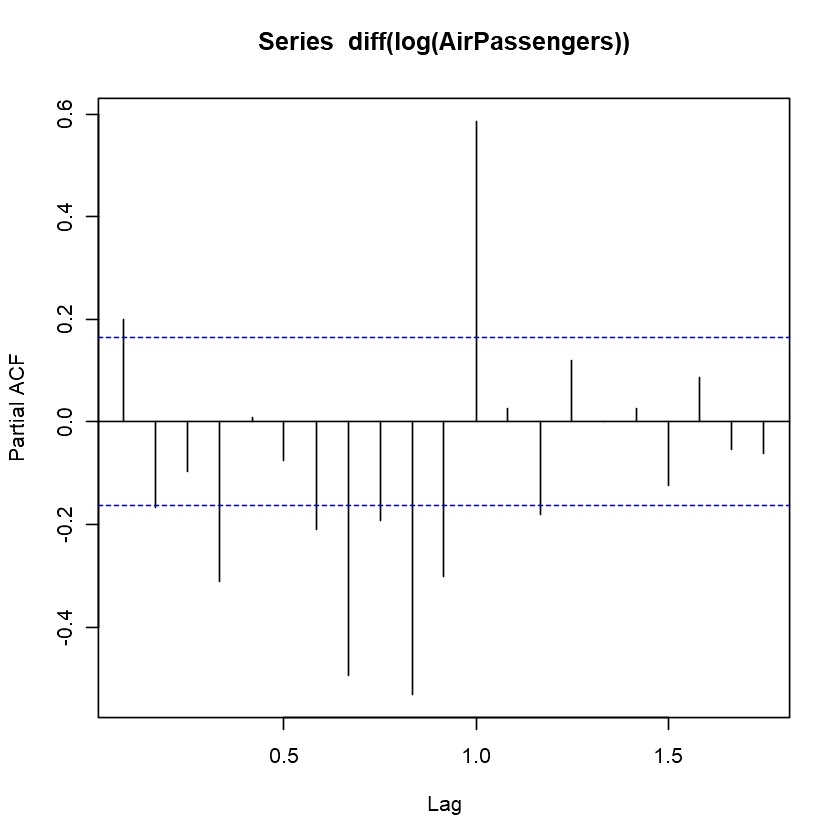

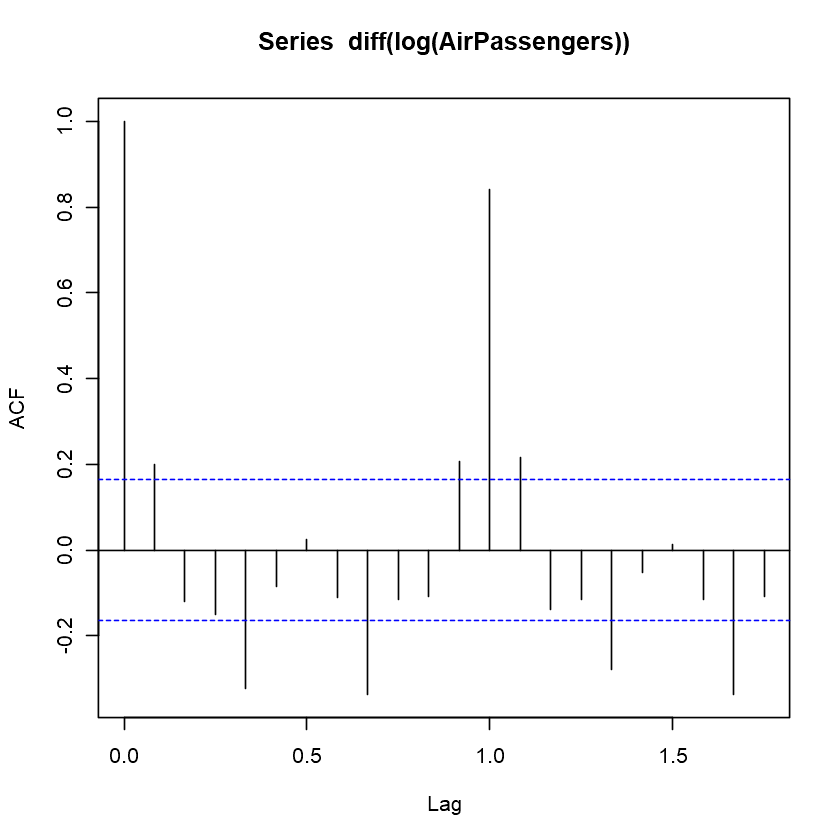

In [8]:
pacf(diff(log(AirPassengers))) 
acf(diff(log(AirPassengers)))

In [9]:
library("forecast")

nsdiffs(AirPassengers)  # number for seasonal differencing needed
#> 1




[1] 1

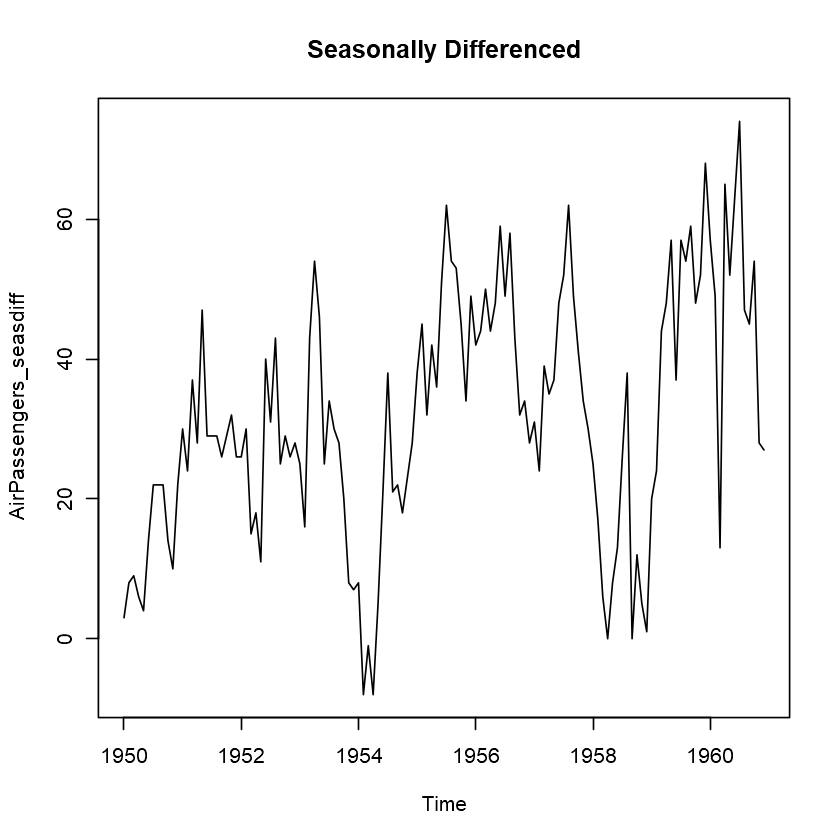

In [10]:
AirPassengers_seasdiff <- diff(AirPassengers, lag=frequency(AirPassengers),
                               differences=1)  # seasonal differencing
plot(AirPassengers_seasdiff, type="l", main="Seasonally Differenced")

[1] 1

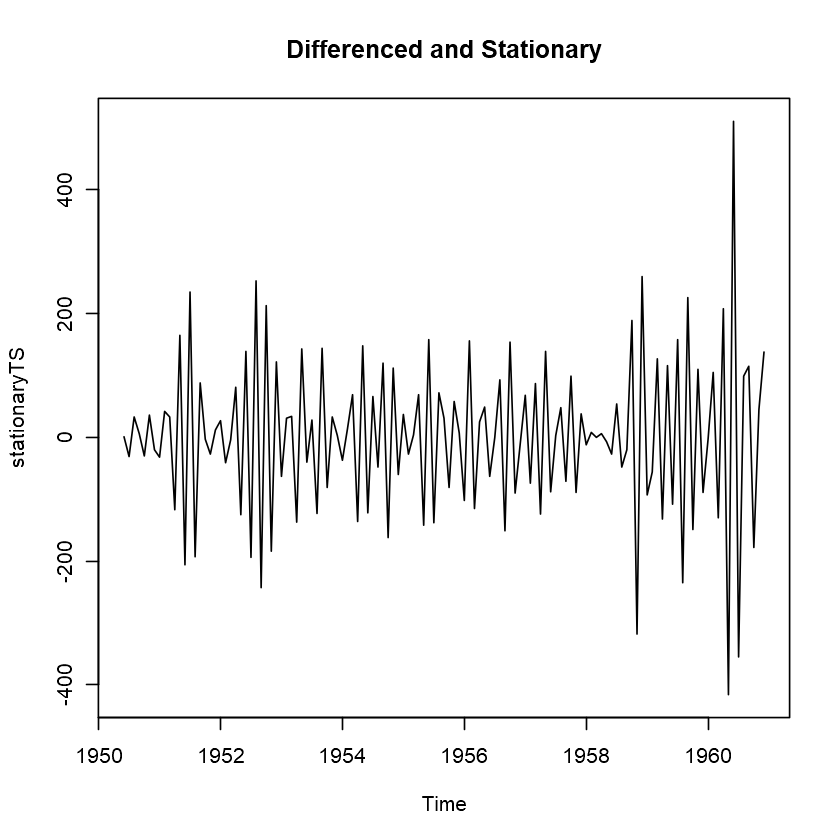

In [13]:
ndiffs(AirPassengers_seasdiff)  # number of differences need to make it stationary
#> 1 
stationaryTS <- diff(AirPassengers_seasdiff, differences= 5)
plot(stationaryTS, type="l", main="Differenced and Stationary")  

In [12]:
adf.test(stationaryTS)

Warning message in adf.test(stationaryTS):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  stationaryTS
Dickey-Fuller = -5.0472, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary
